In [1]:
linkWorldMap="https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"


import geopandas as gpd
from  fiona import listlayers
listlayers(linkWorldMap)

['countries', 'rivers', 'cities', 'indicators']

In [2]:
countries=gpd.read_file(linkWorldMap,layer='countries')
rivers=gpd.read_file(linkWorldMap,layer='rivers')
cities=gpd.read_file(linkWorldMap,layer='cities')
indicators=gpd.read_file(linkWorldMap,layer='indicators')

In [3]:
countries.cx[:50,:50]

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
5,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472..."
...,...,...
245,Zambia,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096..."
246,Zimbabwe,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325..."
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


<Axes: >

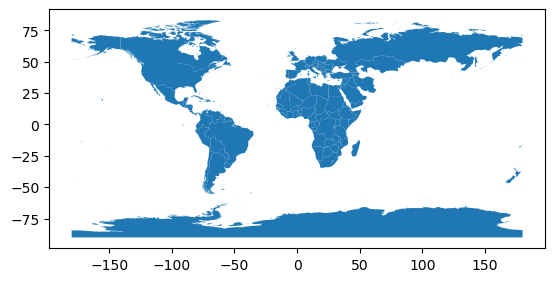

In [4]:
#then
countries.cx[:50,:50].plot()

In [5]:
mexico =countries[countries.COUNTRY=='Mexico']

In [6]:
citiesMexico_clipped = gpd.clip(gdf=cities,
                          mask=mexico)
riversMexico_clipped = gpd.clip(gdf=rivers,
                               mask=mexico)

<Axes: >

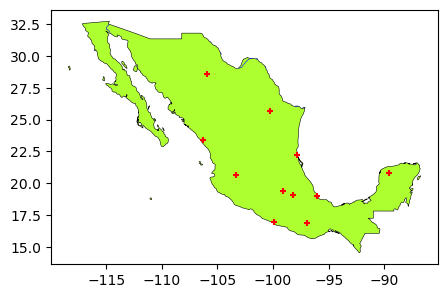

In [7]:
base = mexico.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesMexico_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversMexico_clipped.plot(edgecolor='blue', linewidth=0.4,
                    ax=base)

In [8]:
mexico.to_crs(6362).crs.axis_info

[Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [9]:
# now this works with no warning
mexico.to_crs(6362).centroid

154    POINT (2480735.285 1322377.890)
dtype: geometry

In [10]:
# now this works with no warning
mexico.to_crs(6362).centroid

154    POINT (2480735.285 1322377.890)
dtype: geometry

In [11]:
mexico_6362=mexico.to_crs(6362)
cities_Mexico_6362=citiesMexico_clipped.to_crs(mexico_6362.crs)
rivers_Mexico_6362=riversMexico_clipped.to_crs(mexico_6362.crs)

In [12]:
## saving


import os

mexico_6362.to_file(os.path.join("maps","mexicoMaps_6362.gpkg"), layer='country', driver="GPKG")
cities_Mexico_6362.to_file(os.path.join("maps","mexicoMaps_6362.gpkg"), layer='cities', driver="GPKG")
rivers_Mexico_6362.to_file(os.path.join("maps","mexicoMaps_6362.gpkg"), layer='rivers', driver="GPKG")
mexico_6362.centroid.to_file(os.path.join("maps","mexicoMaps_6362.gpkg"), layer='centroid', driver="GPKG")

In [13]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","mx-airports .csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,4762,MMUN,large_airport,Aeropuerto Internacional de Cancún,21.039444,-86.874304,22.0,NaN,Mexico,MX,...,Cancún,1,MMUN,CUN,NaN,http://www.asur.com.mx/asur/ingles/aeropuertos...,https://en.wikipedia.org/wiki/Canc%C3%BAn_Inte...,NaN,51150,2024-04-02T16:30:59+00:00
1,4731,MMMX,large_airport,Aeropuerto Internacional Lic. Benito Juárez,19.435433,-99.082432,7316.0,NaN,Mexico,MX,...,Ciudad de México,1,MMMX,MEX,ME1,https://www.aicm.com.mx,https://en.wikipedia.org/wiki/Mexico_City_Inte...,AICM,1025275,2022-12-18T11:26:51+00:00
2,4745,MMPR,large_airport,Aeropuerto Internacional Lic. Gustavo Díaz Ordaz,20.679746,-105.246685,23.0,NaN,Mexico,MX,...,Ciudad de Puerto Vallarta,1,MMPR,PVR,NaN,http://vallarta.aeropuertosgap.com.mx/index.ph...,https://en.wikipedia.org/wiki/Lic._Gustavo_D%C...,Licenciado Gustavo Díaz Ordaz,1150,2022-12-18T13:32:23+00:00
3,4750,MMSD,large_airport,Aeropuerto Internacional de Los Cabos,23.151919,-109.720731,374.0,NaN,Mexico,MX,...,San José del Cabo,1,MMSD,SJD,NaN,https://www.loscabosairport.com/,https://en.wikipedia.org/wiki/Los_Cabos_Intern...,NaN,1150,2024-05-07T15:53:13+00:00
2434,528241,MX-2242,heliport,Monarca I Heliport,19.514861,-100.411000,6798.0,NaN,Mexico,MX,...,Zitacuaro,0,NaN,NaN,HUB,NaN,NaN,NaN,0,2024-05-09T16:14:44+00:00
2435,319121,MX-0184,closed,SSV Jupiter I Helideck,19.520472,-92.184506,50.0,NaN,Mexico,MX,...,Zonda De Campeche,0,NaN,NaN,NaN,NaN,NaN,"Offshore, Oil & Gas, Platform, Mobile, SSV, RE...",0,2024-02-15T13:24:25+00:00
2436,329377,MX-0869,closed,SSV Safe Regency Helideck,19.400092,-92.039283,33.0,NaN,Mexico,MX,...,Zonda de Campeche,0,NaN,NaN,NaN,NaN,NaN,"Offshore, Oil & Gas, Platform, Mobile, SSV, RE...",0,2024-02-15T11:51:59+00:00
2437,514410,MX-2119,heliport,Helipuerto Campo Militar 37/D - Santa Lucía,19.752188,-98.981398,7365.0,NaN,Mexico,MX,...,Zumpango,0,NaN,NaN,NLU,NaN,https://es.wikipedia.org/wiki/Base_Aérea_Milit...,NaN,0,2023-11-24T14:45:56+00:00


In [14]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2438 non-null   object 
 1   type           2438 non-null   object 
 2   latitude_deg   2438 non-null   float64
 3   longitude_deg  2438 non-null   float64
 4   elevation_ft   2161 non-null   float64
 5   region_name    2438 non-null   object 
 6   municipality   2407 non-null   object 
dtypes: float64(3), object(4)
memory usage: 133.5+ KB


In [15]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

<Axes: >

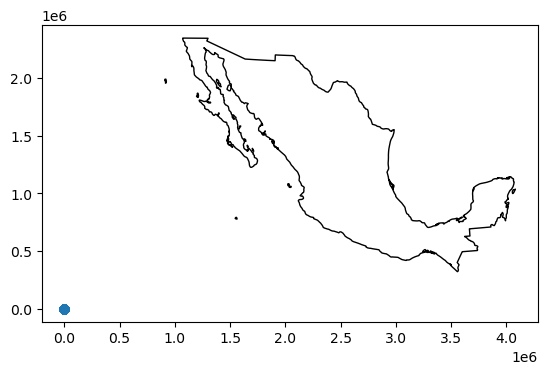

In [16]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=mexico.crs.to_epsg())# the coordinates were in degrees - unprojected

# let's plot

base = mexico_6362.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [17]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

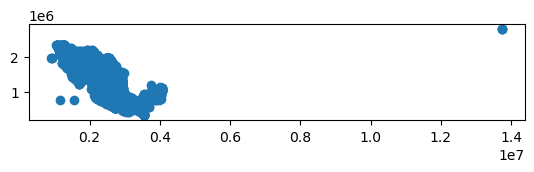

In [18]:
airports_6362=airports.to_crs(6362)

## then

base = mexico_6362.plot(color='white', edgecolor='black')
airports_6362.plot(ax=base)

In [19]:
airports_6362['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     1435
heliport           469
closed             455
medium_airport      56
large_airport       14
seaplane_base        6
balloonport          3
Name: count, dtype: int64

In [20]:
airports_6362.rename(columns={'type':'kind'},inplace=True)

## adding the airports to GPKG
airports_6362.to_file(os.path.join("maps","mexicoMaps_6362.gpkg"), layer='airports', driver="GPKG")

In [21]:
mexico_6362

,COUNTRY,geometry
154,Mexico,"MULTIPOLYGON (((2932937.772 1145022.626, 29326..."


In [22]:
mexico_6362.boundary

154    MULTILINESTRING ((2932937.772 1145022.626, 293...
dtype: geometry

<Axes: >

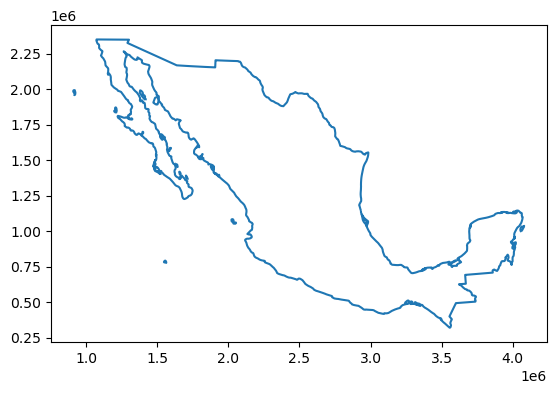

In [23]:
# This is just the borderline
mexico_6362.boundary.plot()

In [24]:
# does 'boundary' return a GDF?
type(mexico_6362.boundary)

geopandas.geoseries.GeoSeries

In [25]:
# converting into GDF
mexico_6362.boundary.to_frame()

,0
154,"MULTILINESTRING ((2932937.772 1145022.626, 293..."


In [26]:
# conversion
mexico_border=mexico_6362.boundary.to_frame()

# new column (optional)
mexico_border['name']='Mexico'

# renaming the geometry column
mexico_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
mexico_border = mexico_border.set_geometry("geometry")

# verifying:
mexico_border.crs

<Projected CRS: EPSG:6362>
Name: Mexico ITRF92 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF92
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [27]:
mexico_states=gpd.read_file(os.path.join("maps","mex_admbnda_govmex_20210618_SHP","mex_admbndp_admALL_govmex_itos_20210618.shp"))
mexico_municipalities=gpd.read_file(os.path.join("maps","mex_admbnda_govmex_20210618_SHP","mex_admbndp_admALL_govmex_itos_20210618.shp"))

In [28]:
type(mexico_states), type(mexico_municipalities)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [29]:
mexico_states.geometry.head()

0     POINT (-89.65038 20.65520)
1    POINT (-101.24578 27.12239)
2    POINT (-101.53601 20.53323)
3    POINT (-100.40594 25.94054)
4     POINT (-98.26829 24.13399)
Name: geometry, dtype: geometry

In [30]:
mexico_municipalities.geometry.head()

0     POINT (-89.65038 20.65520)
1    POINT (-101.24578 27.12239)
2    POINT (-101.53601 20.53323)
3    POINT (-100.40594 25.94054)
4     POINT (-98.26829 24.13399)
Name: geometry, dtype: geometry

<Axes: >

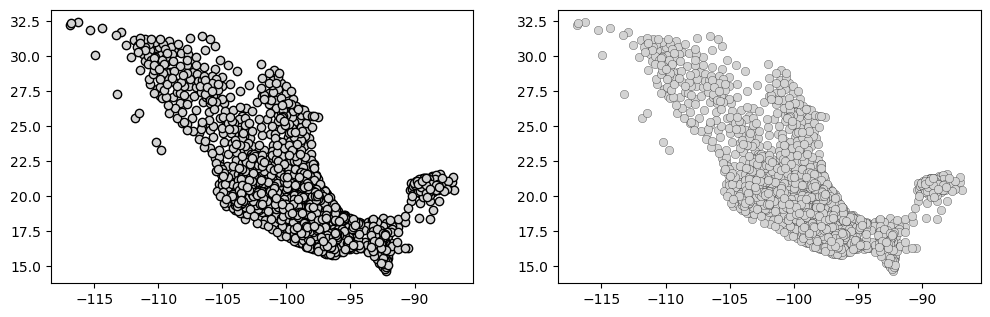

In [31]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

mexico_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
mexico_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [32]:
mexico_states.to_crs(6362)

,Shape_Leng,Shape_Area,ADM2_ES,ADM2_PCODE,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_ES,ADM0_PCODE,date,validOn,validTo,POINT_X,POINT_Y,geometry
0,1.139010,0.025369,Abalá,MX31001,Abala,None,None,Yucatán,MX31,México,MX,2020-06-23,2021-06-18,None,-89.650384,20.655196,POINT (3779935.595 1016058.738)
1,1.490754,0.067645,Abasolo,MX05001,None,None,None,Coahuila de Zaragoza,MX05,México,MX,2020-06-23,2021-06-18,None,-101.245782,27.122395,POINT (2574516.388 1673891.500)
2,2.218582,0.053291,Abasolo,MX11001,None,None,None,Guanajuato,MX11,México,MX,2020-06-23,2021-06-18,None,-101.536012,20.533231,POINT (2548191.419 947549.053)
3,0.285843,0.004224,Abasolo,MX19001,None,None,None,Nuevo León,MX19,México,MX,2020-06-23,2021-06-18,None,-100.405942,25.940543,POINT (2658939.152 1544168.017)
4,2.609799,0.165112,Abasolo,MX28001,None,None,None,Tamaulipas,MX28,México,MX,2020-06-23,2021-06-18,None,-98.268292,24.133989,POINT (2877224.190 1349089.024)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,0.317453,0.001654,Zoquiapan,MX21216,None,None,None,Puebla,MX21,México,MX,2020-06-23,2021-06-18,None,-97.599630,20.009035,POINT (2958740.286 896699.506)
2453,1.141389,0.023020,Zoquitlán,MX21217,Zoquitlan,None,None,Puebla,MX21,México,MX,2020-06-23,2021-06-18,None,-96.929529,18.393920,POINT (3034874.501 720797.299)
2454,0.499022,0.005956,Zozocolco de Hidalgo,MX30203,None,None,None,Veracruz de Ignacio de la Llave,MX30,México,MX,2020-06-23,2021-06-18,None,-97.558574,20.133936,POINT (2962592.505 910601.635)
2455,0.738143,0.017342,Zumpahuacán,MX15119,Zumpahuacan,None,None,México,MX15,México,MX,2020-06-23,2021-06-18,None,-99.554089,18.800117,POINT (2757290.414 758415.701)


In [33]:
# set as unprojected
mexico_states.crs = "EPSG:6362"
mexico_municipalities.crs = "EPSG:6362"

In [34]:
mexico_states=mexico_states.to_crs(6362)
mexico_municipalities=mexico_municipalities.to_crs(6362)